In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS 
import random
import seaborn as sns

In [ ]:
credits_df = pd.read_csv('/content/drive/MyDrive/movie_recommender/tmdb_5000_credits.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/movie_recommender/tmdb_5000_movies.csv')

In [ ]:
print("Credits data contains {} rows and {} columns".format(credits_df.shape[0], credits_df.shape[1]))
print("Movies data contains {} rows and {} columns".format(movies_df.shape[0], movies_df.shape[1]))

Credits data contains 4803 rows and 4 columns
Movies data contains 4803 rows and 20 columns


In [ ]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
credits_df = credits_df.drop(['title'], axis = 1)

In [ ]:
credits_df.columns

Index(['movie_id', 'cast', 'crew'], dtype='object')

Changing the names of the columns in credits dataset.

In [ ]:
credits_df.columns = ['id', 'cast', 'crew']

In [ ]:
credits_df.columns

Index(['id', 'cast', 'crew'], dtype='object')

Joining the two datasets on the 'id' column.

In [ ]:
movies_df = movies_df.merge(credits_df, on = 'id')

In [ ]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies_df['title'] = movies_df['title'].astype('str')
movies_df['overview'] = movies_df['overview'].astype('str')
title_corpus = ' '.join(movies_df['title'])
overview_corpus = ' '.join(movies_df['overview'])

<function matplotlib.pyplot.show>

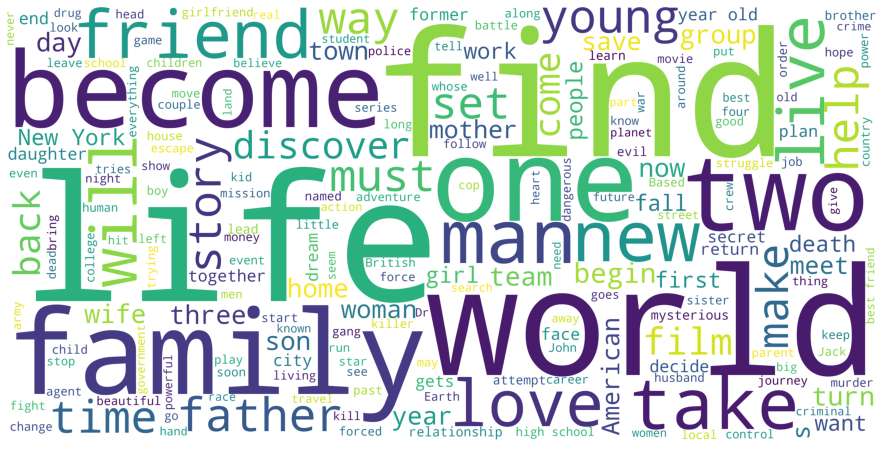

In [ ]:
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(overview_corpus)
plt.figure(figsize = (16, 8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

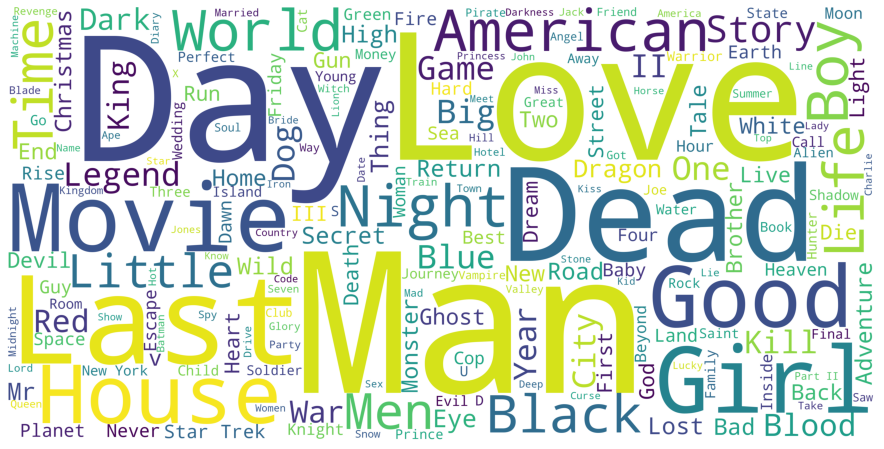

In [ ]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(title_corpus)
plt.figure(figsize = (16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show

**Data Visualization with metadata**

In [ ]:
metadata_df = pd.read_csv('/content/drive/MyDrive/movie_recommender/movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
metadata_df[metadata_df['revenue'] == 0].shape[0]

38052

Majority of the movies have recorder revenue of 0. This indicates that we do not have information about the total revenue for these movies.

In [ ]:
metadata_df['revenue'] = metadata_df['revenue'].replace(0, np.nan)

Franchise Movies

Longest running and the most successful franchises.

In [ ]:
metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
franchise_df = metadata_df[metadata_df['belongs_to_collection'].notnull()]
franchise_df['belongs_to_collection'] = franchise_df['belongs_to_collection'].apply(literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
franchise_df = franchise_df[franchise_df['belongs_to_collection'].notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
franchise_pivot = franchise_df.pivot_table(index = 'belongs_to_collection', values = 'revenue', aggfunc = {'revenue': ['mean', 'sum', 'count']}).reset_index()

In [ ]:
print('Highes Grossing Franchise Movies\n')
franchise_pivot.sort_values('sum', ascending = False).head()

Highes Grossing Franchise Movies



,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [ ]:
print('Longest running franchise\n')
franchise_pivot.sort_values('count', ascending = False).head()

Longest running franchise



,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08


**Original Language**

In [ ]:
metadata_df['original_language'].drop_duplicates().shape[0]

93

In [ ]:
language_df = pd.DataFrame(metadata_df['original_language'].value_counts())
language_df['language'] = language_df.index

In [ ]:
language_df.columns = ['number', 'language']
language_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


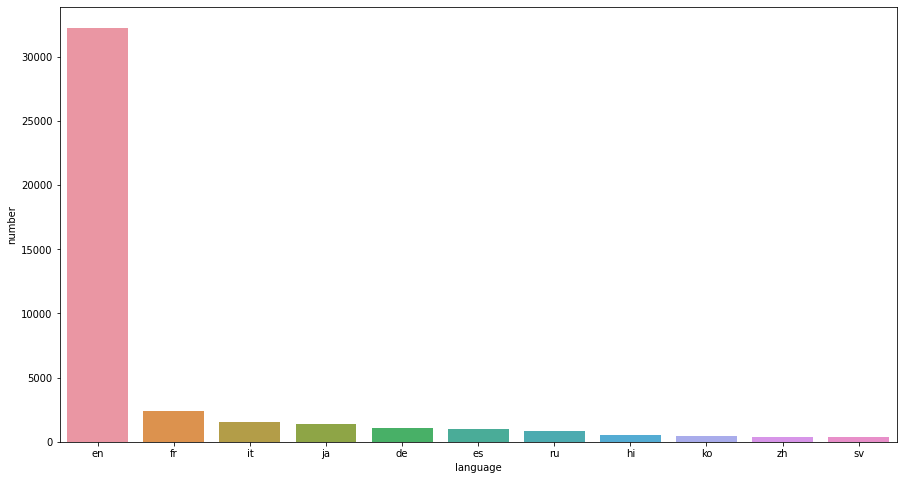

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'language', y = 'number', data = language_df.iloc[:11])
plt.show()

**Popularity, Vote Average and Vote Count**

In [ ]:
def clean_numeric(x):
  try:
    return float(x)
  except:
    return np.nan

In [ ]:
metadata_df['popularity'] = metadata_df['popularity'].apply(clean_numeric).astype('float')
metadata_df['vote_average'] = metadata_df['vote_average'].apply(clean_numeric).astype('float')
metadata_df['vote_count'] = metadata_df['vote_count'].apply(clean_numeric).astype('float')

In [ ]:
metadata_df['vote_average'] = metadata_df['vote_average'].replace(0, np.nan)

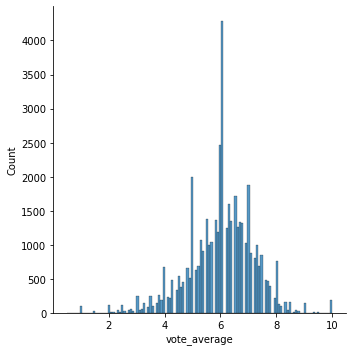

In [ ]:
sns.displot(metadata_df['vote_average'].fillna(metadata_df['vote_average'].median()))

Correlation between popularity and vote average

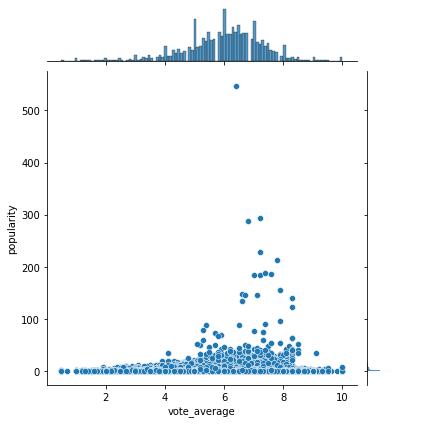

In [ ]:
sns.jointplot(x = 'vote_average', y = 'popularity', data = metadata_df)

Popularity and Vote Average are independent quantities

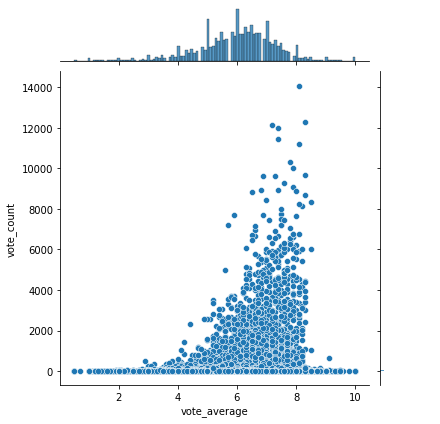

In [ ]:
sns.jointplot(x = 'vote_average', y = 'vote_count', data = metadata_df)

There is a very small correlation between Vote Count and Vote Average.

**Numer of movies by the year**

In [ ]:
metadata_df['year'] = pd.to_datetime(metadata_df['release_date'], errors = 'coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

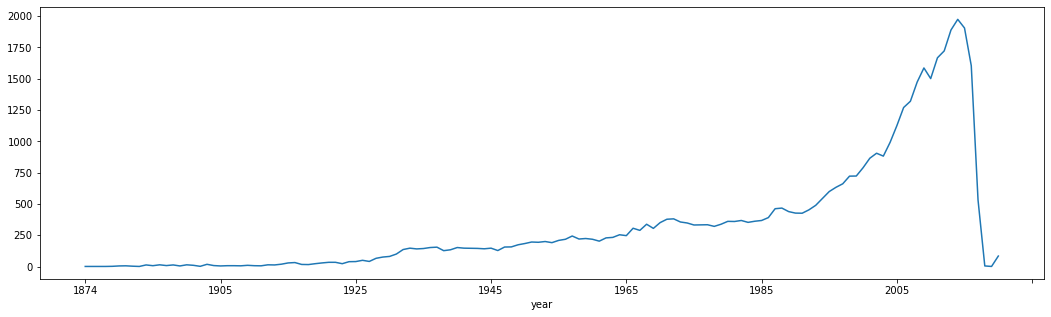

In [ ]:
year_count = metadata_df.groupby('year')['title'].count()
plt.figure(figsize = (18, 5))
year_count.plot()

In [ ]:
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

# **Demographic Filtering**

This simple recommender offers generalized recommendations to every user based on movie popularity and genre. This model does not give personalized recommendations based on the user.

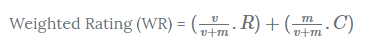

* v: number of votes for the movie
* m: minimum votes required to be listed in the chart
* R: average rating of the movie
* C: mean vote across the whole report

In [ ]:
C = movies_df['vote_average'].mean()

In [ ]:
m = movies_df['vote_count'].quantile(0.9)

In [ ]:
demographic_df = movies_df.copy().loc[movies_df['vote_count'] >= m]

In [ ]:
demographic_df.shape

(481, 22)

In [ ]:
def weighted_rating(movies_df, m = m, C = C):
  v = movies_df['vote_count']
  R = movies_df['vote_average']
  return (v/(v + m) * R) + (m / (m + v) * C)

In [ ]:
demographic_df['weighted_score'] = demographic_df.apply(weighted_rating, axis = 1)

In [ ]:
demographic_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,weighted_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [ ]:
demographic_df = demographic_df.sort_values('weighted_score', ascending = False)

In [ ]:
demographic_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,weighted_score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239


In [ ]:
demographic_df[['title', 'vote_average', 'vote_count', 'weighted_score']].head()

,title,vote_average,vote_count,weighted_score
1881,The Shawshank Redemption,8.5,8205,8.059258
662,Fight Club,8.3,9413,7.939256
65,The Dark Knight,8.2,12002,7.920020
3232,Pulp Fiction,8.3,8428,7.904645
96,Inception,8.1,13752,7.863239


In [ ]:
popular_df = movies_df.sort_values('popularity', ascending = False)

In [ ]:
popular_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de..."
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."


Text(0.5, 1.0, 'Popular Movies')

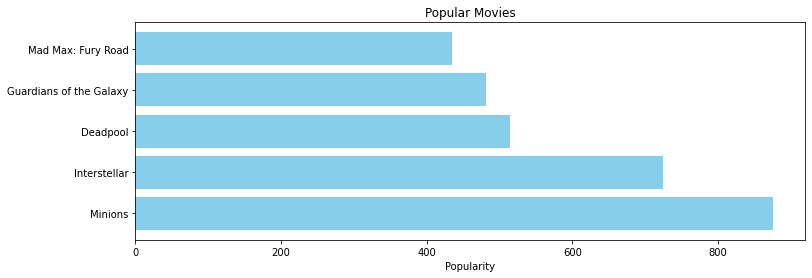

In [ ]:
plt.figure(figsize = (12, 4))
plt.barh(popular_df['title'].head(), popular_df['popularity'].head(), align = 'center', color = 'skyblue')
plt.xlabel('Popularity')
plt.title('Popular Movies')

# **Content Based Filtering**

The content of the movie (overview, cast, crew, keyword, tagline etc) is used fo find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

**Plot description based recommender**

In [ ]:
movies_df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

1. Term frequency is the realtive frequency of a word in a document.
2. Inverse Document Frequency is the relative count of documents containing the term.

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [ ]:
movies_df['overview'].isnull().values.any()

False

In [ ]:
movies_df['overview'] = movies_df['overview'].fillna('')

In [ ]:
movies_df['overview'].isnull().values.any()

False

In [ ]:
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

In [ ]:
tfidf_matrix.shape

(4803, 20979)

Cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. Cosine similarity is independent of magnitude, easy and fast to calculate.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

Creating an index list based on the title column.

In [ ]:
movies_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802],
           dtype='int64', length=4803)

In [ ]:
indices = pd.Series(movies_df.index, index = movies_df['title'])

In [ ]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
def get_recommendations(title, cosine_sim = cosine_sim):
  index = indices[title]
  sim_scores = list(enumerate(cosine_sim[index]))
  print('Similarity scores: ', sim_scores)
  sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
  print('Sorted Similarity scores: ', sim_scores)
  sim_scores = sim_scores[1:11]
  print('Top 10 Similarity scores (except the 1.0): ', sim_scores)
  movie_indices = []
  for i in sim_scores:
    movie_indices.append(i[0])
  print('Movie Indices List: ', movie_indices)
  return movies_df['title'].loc[movie_indices]

In [ ]:
movies_df['title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

Similarity scores:  [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.021121093874993183), (4, 0.045257098111540495), (5, 0.0), (6, 0.0), (7, 0.1463743318256992), (8, 0.04587279492609738), (9, 0.026695558676665405), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.012609172699849567), (15, 0.0), (16, 1.0000000000000002), (17, 0.0359270707479574), (18, 0.0339483652372229), (19, 0.0), (20, 0.010910492909093213), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.009134986548049596), (27, 0.02701086070020013), (28, 0.00926209565685457), (29, 0.05682904531211514), (30, 0.0), (31, 0.013090335324022916), (32, 0.01492718142873754), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0340034920337374), (39, 0.051363599494389844), (40, 0.03723751875020517), (41, 0.050658315673897794), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.013820188413462643), (46, 0.0), (47, 0.014459276485068026), (48, 0.007394856398472884), (49, 0.036055613644064594), (50, 0.009545531280933892), (51, 0.011704492462

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

**Credits, Genres and Keywords Based Recommender**

Building a recommender system based on the following metadata: the top 3 actors, the director, related genres and the movie plot keywords associated with that movie.

In [ ]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
movies_df['keywords'].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [ ]:
movies_df['genres'].head()

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [ ]:
movies_df['crew'].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [ ]:
movies_df['cast'].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

Converting cast, crew, keywords and genres column data, which are present in the form of stringified lists, into a safe and usable structure i.e., parsing the stringified lists.

In [ ]:
columns = ['cast', 'crew', 'keywords', 'genres']
for i in columns:
  movies_df[i] = movies_df[i].apply(literal_eval)

In [ ]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
movies_df['genres'].head()

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, dtype: object

In [ ]:
movies_df['crew'].head()

0    [{'credit_id': '52fe48009251416c750aca23', 'de...
1    [{'credit_id': '52fe4232c3a36847f800b579', 'de...
2    [{'credit_id': '54805967c3a36829b5002c41', 'de...
3    [{'credit_id': '52fe4781c3a36847f81398c3', 'de...
4    [{'credit_id': '52fe479ac3a36847f813eaa3', 'de...
Name: crew, dtype: object

In [ ]:
movies_df['cast'].head()

0    [{'cast_id': 242, 'character': 'Jake Sully', '...
1    [{'cast_id': 4, 'character': 'Captain Jack Spa...
2    [{'cast_id': 1, 'character': 'James Bond', 'cr...
3    [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...
4    [{'cast_id': 5, 'character': 'John Carter', 'c...
Name: cast, dtype: object

Functions to extract the required information from each feature.

Get the Director's name from the 'crew' feature. If director is not listed, return 'NaN'

In [ ]:
def get_director(crew):
  for i in crew:
    if i['job'] == 'Director':
      return i['name']
  return np.nan

In [ ]:
movies_df['director'] = movies_df['crew'].apply(get_director)

In [ ]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...",James Cameron,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...",Gore Verbinski,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...",Sam Mendes,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...",Christopher Nolan,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...",Andrew Stanton,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


Extract the top 3 elements or entire list; whichever is more.

In [ ]:
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
    if len(names) > 3:
      names = names[:3]
    return names
  return []

In [ ]:
columns = ['cast', 'keywords', 'genres']
for i in columns:
  movies_df[i] = movies_df[i].apply(get_list)

In [ ]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


Convert the names and keyword instances into lowercase and strip all the spaces between them. 

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
def clean_data(x):
  if isinstance(x, list):
    return [str.lower(i.replace(' ', '')) for i in x]
  else:
    if isinstance(x, str):
      return str.lower(x.replace(' ', ''))
    else:
      return ''

In [ ]:
columns = ['cast', 'keywords', 'genres']
for i in columns:
  movies_df[i] = movies_df[i].apply(clean_data)

In [ ]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",James Cameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",Gore Verbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",Sam Mendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",Christopher Nolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",Andrew Stanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


Metadata soup is a string that contains all the metadata that we want to feed our vectorizer (namely actors, director and keywords)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' '.join(x['genres']) + ' '.join(x['cast'])

In [ ]:
movies_df['soup'] = movies_df.apply(create_soup, axis = 1)

In [ ]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres', 'soup']].head()

,title,cast,director,keywords,genres,soup
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",James Cameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]",cultureclash future spacewaraction adventure f...
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",Gore Verbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]",ocean drugabuse exoticislandadventure fantasy ...
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",Sam Mendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]",spy basedonnovel secretagentaction adventure c...
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",Christopher Nolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]",dccomics crimefighter terroristaction crime dr...
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",Andrew Stanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]",basedonnovel mars medallionaction adventure sc...


In [ ]:
movies_df['soup'].head()

0    cultureclash future spacewaraction adventure f...
1    ocean drugabuse exoticislandadventure fantasy ...
2    spy basedonnovel secretagentaction adventure c...
3    dccomics crimefighter terroristaction crime dr...
4    basedonnovel mars medallionaction adventure sc...
Name: soup, dtype: object

In [ ]:
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(movies_df['soup'])

In [ ]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,soup
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron,cultureclash future spacewaraction adventure f...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski,ocean drugabuse exoticislandadventure fantasy ...
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes,spy basedonnovel secretagentaction adventure c...
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan,dccomics crimefighter terroristaction crime dr...
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton,basedonnovel mars medallionaction adventure sc...


In [ ]:
indices = pd.Series(movies_df.index, index = movies_df['title'])

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

Similarity scores:  [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.9999999999999997), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.14285714285714282), (10, 0.14285714285714282), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.14285714285714282), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.14285714285714282), (41, 0.14285714285714282), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.28571428571428564), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.14285714285714282), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78,

119                Batman Begins
65               The Dark Knight
280               Public Enemies
299               Batman Forever
1043           Miss Congeniality
210               Batman & Robin
4526                    The R.M.
4638    Amidst the Devil's Wings
3976                 Close Range
4184           Deadline - U.S.A.
Name: title, dtype: object

# **Collaborative Filtering**

Content Based Filtering is only capable of suggesting movies which are close to a certain movie. It is not capable of capturing tastes and providing recommendations across genres. The system is not personal as it doesn't capture the personal tastes and biases of a user.

1. User Based Filtering - These systems recommend products to a user that similar users have liked. One issue is that the user's preference can change over time and precomputing the matrix based on their neighboring users may lead to bad performance. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
2. Item Based Filtering - These systems recommends items based on their similarity with the items that the target user rated. It is more static. One issue here is scalability. The computation grows with both the customer and the product. The worst case complexity is O(m*n) with 'm' users and 'n' items. Another issue is sparsity.

**Single Value Decomposition**

To handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. One common metric is RMSE.

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633982 sha256=c23f7ef6cf8ba0579cd08e213fd3dc4c6bb45eafd926ab5b7cb27dee6888bcb5
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, SVD, Reader
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

Collaborative Filtering requires user id.

In [ ]:
ratings_df = pd.read_csv('/content/drive/MyDrive/movie_recommender/ratings.csv')

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
ratings_df.shape

(26024289, 4)

In [ ]:
print('Ratings data contains {} rows and {} columns'.format(ratings_df.shape[0], ratings_df.shape[1]))

Ratings data contains 26024289 rows and 9 columns


In [ ]:
import datetime
min_time = datetime.datetime.fromtimestamp(min(ratings_df.timestamp)).isoformat()
max_time = datetime.datetime.fromtimestamp(max(ratings_df.timestamp)).isoformat()
print('Timestamp for ratings are from {} to {}:'.format(min_time, max_time))

Timestamp for ratings are from 1995-01-09T11:46:44 to 2017-08-04T06:57:50:


In [ ]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [ ]:
def check_missing(ratings_df):
  total = ratings_df.isnull().sum().sort_values(ascending = False)
  percent = (ratings_df.isnull().sum() / ratings_df.isnull().count() * 100).sort_values(ascending = False)
  return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent']).transpose()

In [ ]:
check_missing(ratings_df)

,userId,movieId,rating,timestamp
Total,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0


Extract datetime

In [ ]:
ratings_df['time'] = ratings_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp,time
0,1,110,1.0,1425941529,2015-03-09 22:52:09
1,1,147,4.5,1425942435,2015-03-09 23:07:15
2,1,858,5.0,1425941523,2015-03-09 22:52:03
3,1,1221,5.0,1425941546,2015-03-09 22:52:26
4,1,1246,5.0,1425941556,2015-03-09 22:52:36


In [ ]:
ratings_df['year'] = ratings_df['time'].dt.year
ratings_df['month'] = ratings_df['time'].dt.month
ratings_df['day'] = ratings_df['time'].dt.day
ratings_df['dayofweek'] = ratings_df['time'].dt.dayofweek

In [ ]:
ratings_df[['year', 'month', 'day', 'dayofweek']].describe()

,year,month,day,dayofweek
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,2.006612e+03,6.565037e+00,1.564084e+01,2.948023e+00
std,6.536718e+00,3.510822e+00,8.799937e+00,2.042010e+00
min,1.995000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.001000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,2.006000e+03,7.000000e+00,1.600000e+01,3.000000e+00
75%,2.013000e+03,1.000000e+01,2.300000e+01,5.000000e+00
max,2.017000e+03,1.200000e+01,3.100000e+01,6.000000e+00


Date time distribution

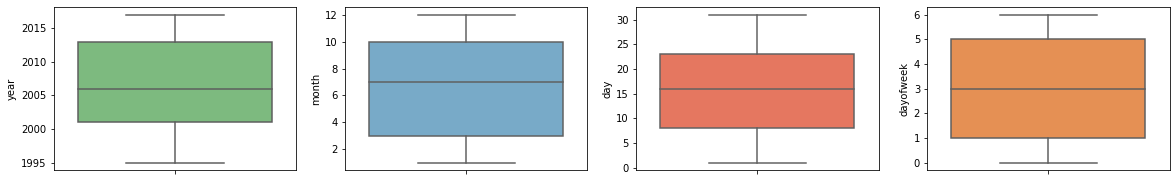

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (20, 3))
s = sns.boxplot(ax = ax1, y = 'year', data = ratings_df, palette = 'Greens', showfliers = True)
s = sns.boxplot(ax = ax2, y = 'month', data = ratings_df, palette = 'Blues', showfliers = True)
s = sns.boxplot(ax = ax3, y = 'day', data = ratings_df, palette = 'Reds', showfliers = True)
s = sns.boxplot(ax = ax4, y = 'dayofweek', data = ratings_df, palette = 'Oranges', showfliers = True)

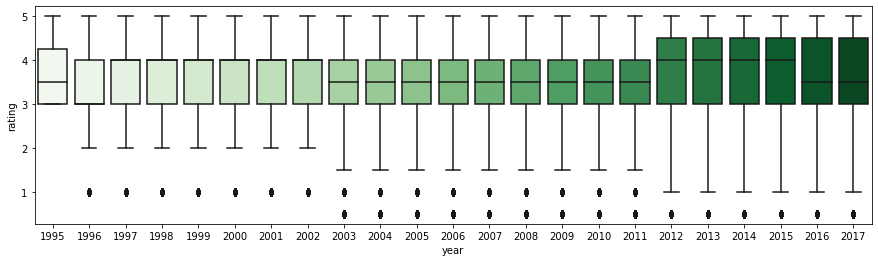

In [ ]:
fig, ax = plt.subplots(ncols = 1, figsize = (15, 4))
s = sns.boxplot(x = 'year', y = 'rating', data = ratings_df, palette = 'Greens', showfliers = True)
plt.show()

In [ ]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 20, max_font_size = 40, scale = 5, random_state = 1).generate(str(data))
  fig = plt.figure(1, figsize = (10, 10))
  plt.axis('off')
  if title:
    fig.suptitle(title, fontsize = 20)
    fig.subplots_adjust(top = 2.3)
  
  plt.imshow(wordcloud)
  plt.show()

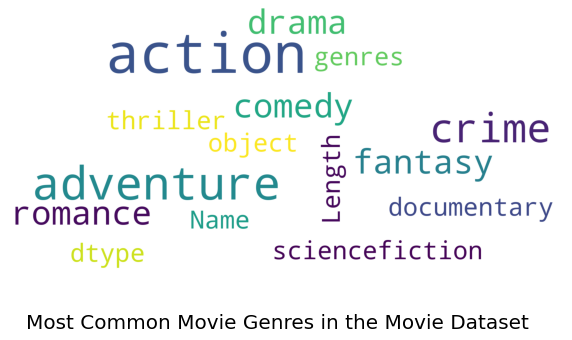

In [ ]:
show_wordcloud(movies_df['genres'], title = 'Most Common Movie Genres in the Movie Dataset')

Movies are rated on a scale of 5.

In [ ]:
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [ ]:
svd = SVD()
cross_validate(svd, data, measures = ['RMSE', 'MAE'])

Training on the dataset to check predictions.

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Pick a user id and check the ratings he/she has given.

In [ ]:
ratings_df[ratings_df['userId'] == 1]

In [ ]:
svd.predict(1, 302, 3)

# **Hybrid Systems**

Hybrid recommender brings together techniques of content based and collaborative filter based engines.

# **References**

https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook

https://www.kaggle.com/code/gpreda/movie-recommendation-model/notebook

https://www.kaggle.com/code/ahmednour/movie-recommendation-engine/notebook